# ASSIGNMENT 3: DETECTION OF SPAM MAILS

In this assignment, it is asked to implement naive bayes algorithm from the scratch and to apply this algorithm for given ham/spam email dataset. Our aim is to predict whether an e-mail is a spam or not using the naive bayes model. This report shows steps we have followed, code implementations and analysis of results for the naive bayes algorithm.

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem. The Naive Bayes algorithm is quick and simple to implement, but the necessity that predictors be independent is its major drawback.

## PART 1: Understanding the Data

Machine learning algorithms classify data using statistical models. In the instance of spam detection, a trained machine learning model must be able to tell if the sequence of words in an email is more similar to spam emails or not. Different machine learning methods can detect spam, in this assignment we use Naive Bayes. The "Bayes' theorem," which describes the likelihood of an event dependent on prior knowledge, is the foundation of Naive Bayes. The problem is that our characteristics aren't always self-contained.

Naive Bayes, like other machine learning algorithms, does not understand linguistic context and instead relies on statistical relationships between words to determine whether a piece of text belongs to a specific class. This means that a Naive Bayes spam detector, for example, can be fooled into missing a spam email if the sender simply adds some non-spam words at the end of the message or replaces spammy terms with closely related words.

Consider the words "not" and "interesting", in this situation, depending on where they appear in the message, the meaning can be radically different. Despite the fact that feature independence in text data is difficult to achieve, the Naive Bayes classifier has proven to be effective in natural language processing applications when correctly configured. In the following sections, it is going to be tested and interpreted whether Naive Bayes is succesful on email spam detection.

On the other hand, many spam e-mails contain a large amount of "spammy" terms such as "free," "money," "product," and so on. This knowledge may aid us in making better decisions when it comes to the design of the spam detection system.

Therefore, detecting e-mails by analizing its words is a feasible approach to solve this problem. Generally, manipulative, needy, cheap, shady and fat-fetched words such as "exclusive deal", "free, "limited time", "offer expires", "urgent", "best price", "bargain", "great offer", "money" are well-known as spammy. On the other hand, classifying e-mails based on only words can be problematic due to the deficit of context interpretation.

In [4]:
import pandas as pd
import numpy as np
import string
import math
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [22]:
data = pd.read_csv("emails.csv")
data.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [23]:
print("Shape:",data.shape)

Shape: (5728, 2)


In [24]:
data["spam"].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<AxesSubplot:xlabel='spam', ylabel='count'>

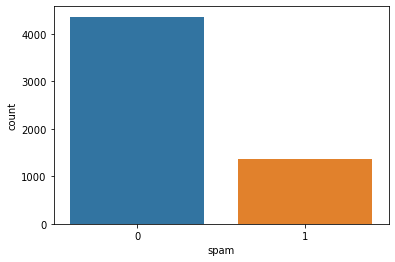

In [25]:
import seaborn as sns
sns.countplot(x="spam", data = data)

As can be seen above, the given data has two columns which are "text" and "spam". Spam=1 means that this e-mail is actually spam. Thus, our data has 4360 ham and 1368 spam mails which makes total 5728 e-mails. It can be seen that there is an imbalance on the number of ham and spam e-mails in the given data.

In order to be able to interpret the data, it is needed to compute the frequencies of words and create a dictionary which holds unique words in the given data along with their frequencies. After reading the data file and storing it into a pandas dataframe, the data is splitted into train and test with shuffling.

In [11]:
def get_frequencies(vectorizer, xtrain, ytrain):
    y = vectorizer.fit_transform(xtrain)
    doc_array = y.toarray()

    frequency_matrix = pd.DataFrame(data=doc_array, columns=vectorizer.get_feature_names_out())

    words = list(frequency_matrix.columns.values)
    freq = {}
    words_count = [0,0]
    
    for i, j in frequency_matrix.iterrows():
        create_dictionary(freq, words, j.tolist(), ytrain[i], words_count)
    return freq, frequency_matrix, words_count

In this function, the vectorizer is supplied with the training data and frequency matrix is created. After that each row in frequency matrix is sent to "create_dictionary" function to calculate frequencies.

In [6]:
def create_dictionary(freq, words, row, is_spam, words_count):
    i = 0
    for item in row:
        if item != 0:
            if words[i] in freq:
                arr = freq[words[i]]
                arr[is_spam] += item
                freq[words[i]] = arr
                words_count[is_spam] += item

            else:
                arr = [0, 0]
                arr[is_spam] = item
                freq[words[i]] = arr
                words_count[is_spam] += item
        i += 1
    return freq


This function returns a dictioanry which includes each unique word as key and its frequencies on spam and ham mails as a list in the value. For instance, 'subject', [3498, 1084] means that the word "subject" is mentioned in 3498 ham mails and 1084 spam mails.

In [2]:
def get_frequencies_unigram(xtrain, ytrain, min_df, max_df):
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), token_pattern=r'\b[a-zA-Z]\w+\b',
                                 max_df=max_df, min_df=min_df)
    return get_frequencies(vectorizer, xtrain, ytrain)

In [3]:
def get_frequencies_unigram_without_stopwords(xtrain, ytrain, min_df, max_df):
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), token_pattern=r'\b[a-zA-Z]\w+\b',
                                 stop_words=ENGLISH_STOP_WORDS)
    return get_frequencies(vectorizer, xtrain, ytrain)


In [7]:
def get_frequencies_bigram(xtrain, ytrain, min_df, max_df):
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2), token_pattern=r'\b[a-zA-Z]\w+\b',
                                 min_df=min_df, max_df=max_df)
    return get_frequencies(vectorizer, xtrain, ytrain)

In [8]:
def get_frequencies_bigram_without_stopwords(xtrain, ytrain, min_df, max_df):
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2), token_pattern=r'\b[a-zA-Z]\w+\b',
                                 stop_words=ENGLISH_STOP_WORDS, min_df=min_df, max_df=max_df)
    return get_frequencies(vectorizer, xtrain, ytrain)

In [38]:
def get_frequencies_unigram_bigram(xtrain, ytrain, min_df, max_df):
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2), token_pattern=r"(?u)\b\w+\b")
    return get_frequencies(vectorizer, xtrain, ytrain)

In order to implement BoW model, CountVectorizer is used. The functions above create different vectorizers according to whether words are tokenized as unigram or bigrams.

In [9]:
import operator
df = pd.read_csv('emails.csv')
x = df.text.values
y = df.spam.values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, shuffle=True)

In [12]:
unigram_freq, freq_matrix, words_count = get_frequencies_unigram(xtrain, ytrain, 1, 1.0)
sorted_unigram = sorted(unigram_freq.items(), key=operator.itemgetter(1), reverse=True)
unigram_freq_no_stopwords, freq_matrix_no_stopwords, words_count = get_frequencies_unigram_without_stopwords(xtrain, ytrain, 1, 1.0)
sorted_unigram_no_stopwords = sorted(unigram_freq_no_stopwords.items(), key=operator.itemgetter(1), reverse=True)

print("--------------------------UNIGRAM MOST FREQUENT WORDS----------------------------")
print(list(sorted_unigram)[:3])
print("-----------------UNIGRAM (WITHOUT STOPWORDS) MOST FREQUENT WORDS-----------------")
print(list(sorted_unigram_no_stopwords)[:3])

--------------------------UNIGRAM MOST FREQUENT WORDS----------------------------
[('the', [33277, 7604]), ('to', [27024, 6864]), ('and', [16837, 5448])]
-----------------UNIGRAM (WITHOUT STOPWORDS) MOST FREQUENT WORDS-----------------
[('enron', [10785, 0]), ('ect', [9150, 1]), ('vince', [6929, 0])]


It can be seen that the word "subject" is the most frequent word in both ham and spam mails but it does not help our algorithm to classify better since it is not rare and cannot distinguish spam e-mails from ham e-mails. When we include stopwords, "to" and "the" are the next most frequent words in both spam and ham e-mails. However, they don't contribute any useful information neither, since they are frequently written in both ham and spam e-mails. On the other hand, when stopwords are removed, the most frequent words (in ham e-mails) after "subject" are "vince" and "enron".

In [34]:
freq_matrix.head(10)

,aa,aaa,aaaenerfax,aal,aaldous,aaliyah,aall,aanalysis,aaron,aawesome,...,zwwyw,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The frequency matrices for unigram are shown above. The first matrix has 30259 columns which means there are 30259 unique words, each row shows the frequencies of each word on that particular e-mail. For instance, in the first e-mail of our data, the word "aa" is not typed because its value is 0.

## PART 2: Implementing Naive Bayes

When tranining the machine learning model on the training data set, each term is assigned a weight based on how many times it appears in spam and ham emails. For example, if "win big money prize" is one of the features and only appears in spam emails, it will be assigned a higher probability of being spam. If "important meeting" is only mentioned in ham emails, then including it in an email increases the likelihood of that email being classified as not spam.

In [31]:
def naive_bayes(ham_count, spam_count, freq, xtest, ngram, words_count, stop_words):
    y_pred = []
    for test in xtest:
        p_spam = math.log2(spam_count / (spam_count + ham_count))
        p_ham = math.log2(ham_count / (spam_count + ham_count))

        # probability for spam
        p_spam += calculate_probability(test, freq, 1, words_count[1], ngram, stop_words)

        # probability for spam
        p_ham += calculate_probability(test, freq, 0, words_count[0], ngram, stop_words)

        if p_spam > p_ham:
            y_pred.append(1)
        else:
            y_pred.append(0)

    return y_pred


In this function, the probability of being spam or ham are calculated respectively. Then, e-mail is labeled as spam if the probability calculated for spam is greater than probability calculated for ham, and vice versa. One thing important here to state is that the probabilities are calculated with logairthm function in order to prevent numerical underflow when calculating multiplicative probabilities. The probabilities are substitued into logarithm function, then they are summed up.

In [32]:
def calculate_probability(test, freq, is_spam, total_word_count, ngram, stop_words):
    prob = 0
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(ngram, ngram), stop_words=stop_words)
    y = vectorizer.fit_transform([test])
    test = vectorizer.get_feature_names()
   
    for word in test:
        if word in freq:
            prob += laplace_smoothing(freq[word][is_spam], 1, total_word_count, len(freq))

        else:
            prob += laplace_smoothing(0, 1, total_word_count, len(freq))
    return prob


This function calls laplace smoothing for each word in test sample, sums results up, returns the total probability.

In [33]:
def laplace_smoothing(freq, alpha, class_count, total_count):
    return math.log2((freq + alpha) / (class_count + total_count))

When calculating the probabilites, we may encounter some words that we havent during training. In this case, the frequency of that word would be 0, which dominates the result of our probability. This problem can be eliminated by using Laplace Smoothing also known as Add One Smoothing when alpha is 1. In this technique, we add 1 to the numerator, and we add k to the denominator. So, in the case that we don’t have a particular ingredient in our training set, the posterior probability comes out to 1 / N + k instead of zero. Plugging in this value into the product does not destroy our ability to make a prediction in the same way that plugging in a zero does.

In "laplace_smoothing" function, freq is the value of how many times the current word is typed in spam/ham e-mails, class_count is total spam/ham e-mail count and total_count is the number of total unique words.

EĞER FONKSİYON DEĞİŞİRSE BU KISMI DA DEĞİŞTİRELİM!!!!!!!!!!!!!!!!

In [34]:
def classification_report(ytest, ypred):
    tp = tn = fp = fn = 0
    for i in range(len(ytest)):
        if ytest[i] == ypred[i]:
            if ytest[i] == 1:
                tp += 1
            else:
                tn += 1
        else:
            if ypred[i] == 1:
                fp += 1
            else:
                fn += 1

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = (tp) / (tp + fp)
    recall = (tp) / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("accuracy  : " + str(accuracy))
    print("precision : " + str(precision))
    print("recall    : " + str(recall))
    print("f1_score  : " + str(f1_score))

In this function, predicted classification and actual classification are compared. Accuracy, recall, precision and f1 score are calculated by computing confusion matrix values like FN, FP, TP and TN.

## PART 3: Analysis

### Analyzing effect of the words on prediction

In the second part of the assignment, term frequency is used when implementing Naive Bayes, which means that we consider entire dataset as equally important and and made our computations solely based on how many times a word occured in the dataset. However, 

When calculating TF, all terms are given equal weight. However, it is well known that some phrases, such as "is," "of," and "that," may appear frequently but have little meaning. As a result, we must scale down the frequent phrases while scaling up the rare ones. In this part of the assignment, TF-IDF (Inverse Document Frequency) will be implemented and compared to previous frequency implementation.

When computing IDF, an inverted document frequency factor is used, which reduces the weight of terms that appear frequently in the document collection while increasing the weight of terms that occur infrequently.

The information density factor (IDF) is the inverse of the document frequency, which assesses the informativeness of word t. When we compute IDF, it will be very low for the most often occurring words, such as stop words (since stop words like "is" appear in practically every text, and N/df will give that word a very low number). Finally, we have what we're looking for: a relative weighting.

Thus, it can be said that TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents and we will make use of that in order to improve our classification performance by selecting the most effective words in the dictionary.

In [21]:
def list_effective_words(data):
    #instantiate CountVectorizer() 
    cv=CountVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]\w+\b',) 

    # this steps generates word counts for the words in your docs 
    word_count_vector=cv.fit_transform(data)

    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
    tfidf_transformer.fit(word_count_vector)

    df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names_out(),columns=["idf_weights"]) 
    result = df_idf.sort_values(by=['idf_weights'])

    # sort ascending 
    return result[-9:], result[:9]
    

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


spam_data = df[df["spam"] == 1]["text"].tolist()
ham_data = df[df["spam"] == 0]["text"].tolist()

spam_most_effective, spam_least_effective = list_most_effective_words(spam_data)
ham_most_effective, ham_least_effective = list_most_effective_words(ham_data)

print("-------------------SPAM MOST EFFECTIVE WORDS-----------------------")
print(spam_most_effective)
print("------------------SPAM LEAST EFFECTIVE WORDS-----------------------")
print(spam_least_effective)
print("-------------------HAM MOST EFFECTIVE WORDS-----------------------")
print(ham_most_effective)
print("-------------------HAM LEAST EFFECTIVE WORDS-----------------------")
print(ham_least_effective)


-------------------SPAM MOST EFFECTIVE WORDS-----------------------
           idf_weights
nominal       7.528689
nominate      7.528689
distent       7.528689
nomme         7.528689
nomore        7.528689
nomorel       7.528689
distant       7.528689
nomatter      7.528689
kuhvzhfdm     7.528689
------------------SPAM LEAST EFFECTIVE WORDS-----------------------
         idf_weights
subject     1.000000
to          1.163938
the         1.233423
and         1.325141
you         1.331227
of          1.341452
your        1.360124
for         1.411693
is          1.443051
-------------------HAM MOST EFFECTIVE WORDS-----------------------
           idf_weights
gapping       8.687309
gammas        8.687309
gammar        8.687309
gammal        8.687309
quesions      8.687309
quesitons     8.687309
quesnel       8.687309
queensl       8.687309
levesque      8.687309
-------------------HAM LEAST EFFECTIVE WORDS-----------------------
         idf_weights
subject     1.000000
to          1.072

As mentioned previously, TF-IDF detects the most effective and rare words in our dataset. When the value related to a word is low (like 1.0 in our case), it means that this word does not provide deterministic information to our algoirthm. On the other hand, while the value rises up, it means that this word is effective when classifying as it is rare.

For instance, top 10 words with the greatest TF-IDF values for spam classification are listed above as: nominal, nominate, distent, nomme, nomore, nomorel, distant, nomatter with values almost 7.53. The presence of these words most strongly predicts that the e-mail is spam. On the other hand, top 10 words with the lowest TF-IDF values are subject, to, the, and, you, of, your, for and is. It is obvious that most of these words are stopwords and occurs in the majority of the given dataset. For instance, the TF-IDF value of subject is 1.0 which means that this word is typed in all of the spam e-mails and it is the most common  word in our dataset. The absence of these words most strongly predicts that e-mail is spam.

On the other hand, for the ham classification, top 10 words with the greatest TF-IDF values are gapping, gammas, gammar, gammal, quesions, quesitons, quesnel, queensl and levesque with the value almost 8.69. The presence of these words most strongly predicts that the e-mail is ham. On the contary, top 10 words with the lowest TF-IDF values are subject, to, the, and, for, you, of, on, in. These words are also mostly stopwords and the absence of these words most strongly predicts that e-mail is ham.

REIMPLEMENT FOR NAIVE BAYES!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Preprocessing

Before supplying our data to CountVectorizer it is required to preprocess the data. First of all, lowering the case of e-mails is essential since the words "HELLO" and "hello" are the same and lowering them is very helpful for reducing the dimensions by shrinking the size of the dictionary. Whitespaces are removed since they do not have any impact on our classifier. Lastly, numbers are discarded since they do not provide any difference to make our algorithm works more accurately.

### Stopwords

The definition of a stop word varies. A stop word is a word that appears frequently in a corpus. Or, given a context, you can consider any word that is devoid of true meaning. Articles and some verbs are commonly regarded as stop words because they do not assist us in determining the context or true meaning of a sentence. These are words that can be removed without affecting the final model that you are training. However, the removal of stopwords is not necessary in all situations.

Stopwords should be removed if they add no new information to your problem. They are usually unnecessary in classification problems because it is possible to discuss the general idea of a text even if stop words are removed. Thus, we remove the low-level information from our text by removing these words, allowing us to focus on the important information. In other words, the removal of such words has no negative consequences for the model we train for our task.

Removal of stop words definitely reduces the dataset size and thus reduces the training time due to the fewer number of tokens involved in the training.

In e-mail classification, the occurence of stopwords are not essential because the context of the mail, whether it is spam or ham, can be inferred from the other words. Furthermore, removal of stopwords shrinks the data and improves the performance of our algorithm. The analysis of the removal of stopwords wil be discussed in the upcoming section.

### Tokenizing - Unigram, Bigram

Text data must be "tokenized" before being fed to machine learning algorithms, both for training and for making predictions on new data. Tokenization is the process of dividing text data into smaller pieces. If you divide the preceding data set into single words (also known as unigrams), you'll get the following vocabulary. It's worth noting that I only used each word once. If we use occurence of a single word, it is called unigram. On the other hand, if we use the occurence of two adjacent words, it is called bigram.

When creating vectorizers, we set different max_df and min_df values. "max_df" is used for removing terms that appear too frequently. "max_df" is set to 1.0 by default, which indicates "exclude terms that exist in more than 100% of the documents." As a result, no terms are ignored by the default configuration. On the other hand, "min_df" is used for removing terms that appear too infrequently. The default value for min df is 1, which implies "ignore terms appearing in fewer than one document." As a result, no terms are ignored by the default configuration. 

If we use the default settings, which include all phrases, you will generate far more tokens. As a result, our classification process will take longer. Removing too rare and too common terms may be useful. However, the most significant issue is that if the min and max are set incorrectly, some vital terms may be lost, lowering the quality. In this assignment, we prefer to discard the most rare and common words since we believe that they do not have a significant effect on our classifier quality. We set min_df as 0.01 and max_df as 0.8, which means that our classifier ignores the words included in more than 80% of e-mails and included in less than 1% of e-mails.

To summarize, trimming terms using min_df and max_df improves the performance of our classifier rather than the quality.

MAX_DF VE MIN_DF DEĞİŞİRSE BURAYI TEKRAR DÜZENLE!!!!!!!!!!!!!!!!!!!!!!!!!!!

## PART 4: Calculation of Performance Metrics

In [43]:
df = pd.read_csv('emails.csv')

x = df.text.values
y = df.spam.values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, shuffle=True)

ham_count = np.count_nonzero(ytrain == 0)
spam_count = np.count_nonzero(ytrain == 1)

print("--------------------------UNIGRAM DEFAULT PARAM----------------------------")
freq, matrix, words_count = get_frequencies_unigram(xtrain, ytrain, 1, 1.0)
ypred = naive_bayes(ham_count, spam_count, freq, xtest, 1, words_count, None)
classification_report(ytest, ypred)

print("\n-------------------------UNIGRAM WITHOUT STOPWORDS-------------------------")
freq, matrix, words_count = get_frequencies_unigram_without_stopwords(xtrain, ytrain, 1, 1.0)
ypred = naive_bayes(ham_count, spam_count, freq, xtest, 1, words_count, ENGLISH_STOP_WORDS)
classification_report(ytest, ypred)

print("\n----------------------------BIGRAM DEFAULT PARAM----------------------------")
freq, matrix, words_count = get_frequencies_bigram(xtrain, ytrain, 1, 1.0)
ypred = naive_bayes(ham_count, spam_count, freq, xtest, 2, words_count, None)
classification_report(ytest, ypred)

print("\n--------------------------BIGRAM WITHOUT STOPWORDS---------------------------")
freq, matrix, words_count = get_frequencies_bigram_without_stopwords(xtrain, ytrain, 1, 1.0)
ypred = naive_bayes(ham_count, spam_count, freq, xtest, 2, words_count, ENGLISH_STOP_WORDS)
classification_report(ytest, ypred)

print("\n-----------------------BIGRAM & UNIGRAM DEFAULT PARAM-------------------------")
freq, matrix, words_count = get_frequencies_unigram_bigram(xtrain, ytrain, 1, 1.0)
ypred = naive_bayes(ham_count, spam_count, freq, xtest, 2, words_count, None)
classification_report(ytest, ypred)


--------------------------UNIGRAM DEFAULT PARAM----------------------------
accuracy  : 0.9738219895287958
precision : 0.903114186851211
recall    : 0.9923954372623575
f1_score  : 0.9456521739130435

-------------------------UNIGRAM WITHOUT STOPWORDS-------------------------
accuracy  : 0.9790575916230366
precision : 0.9222614840989399
recall    : 0.9923954372623575
f1_score  : 0.9560439560439561

----------------------------BIGRAM DEFAULT PARAM----------------------------
accuracy  : 0.9537521815008726
precision : 0.8322784810126582
recall    : 1.0
f1_score  : 0.9084628670120898

--------------------------BIGRAM WITHOUT STOPWORDS---------------------------
accuracy  : 0.8228621291448517
precision : 0.5643776824034334
recall    : 1.0
f1_score  : 0.7215363511659808

-----------------------BIGRAM & UNIGRAM DEFAULT PARAM-------------------------
accuracy  : 0.912739965095986
precision : 0.7245179063360881
recall    : 1.0
f1_score  : 0.8402555910543131


In the main function, after reading the e-mails data, train and test data are created. Then, frequencies are calculated with different parameters like unigram, bigram, max_df and min_df. Naive Bayes algorithm is revoked by substituting in the frequencies calculated beforehand. Finally, classification report which includes accuracy, recall, precision and f1 score is obtained. The results are shown above.

Moreover, it can be seen from the results that when the stopwords are removed, the size of the dictionary is decreased, therefore the computation time is also decreased. On the contrary, no remarkable change is observed on the results obtained.

When evaluating the performance of a data science model, accuracy is not always the best indicator.
Some real-world problems may have a very imbalanced class, and using accuracy may not provide us with enough confidence to understand the algorithm's performance.
Spam data accounts for approximately 20% of our data in the email spamming problem that we are attempting to solve. If our algorithm correctly classifies all emails as non-spam, it will achieve an accuracy of 80%. So, we obtained all confusion matrix values which are accuracy, recall, precision and f1 score.

From the results obtained above, we can say that our classifier works quite well since the results obtained are generally high. For unigram without stopwords, accuracy=0.97, precision=0.90, recall=0.99 and f1_score=0.95. When we remove the stopwords, the results are slightly changed, also since a relatively small dataset is used, the computation time is decreased as expected. 

For bigram, the results are also gratifying. When stopwords included, accuracy=0.95 , precision=0.83 , recall=1.0 , f1_score=0.91 . In our opinion, providing stopwords parameter to bigram is not a wise choice because bigram tokenizes words as pairs. 

Lastly, when we both provide unigram and bigram parameters, the dataset increases but there is no notable increase on the performance of the classifier.

TEKRAR ÇALIŞTIRIRSAK DEĞERLERİ DÜZENLEYELİM !!!!!!!!!!!!!!!!!!!!!!!!!!!!!